
# Project: Investigate The Soccer Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This soccer database comes from Kaggle. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.it is stored in an SQLite database.
>
> The following are questions to be explored using this dataset:

>><li>League with the highest number of average goals scored per game
>><li>Do home teams win more games than away teams
>><li>The teams with the most wins in each League in the 2014/2015 season
>><li>Did players in 2016 meet the potential set for them in 2008
>><li>Team attribute leading to victory

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

sns.set_style(style='darkgrid')
# inline and loading data
%matplotlib inline
%config InLineBackend.figure_format = 'retina'

<a id='wrangling'></a>
## Data Wrangling

> I Used DB browser to view the various tables and analyse the data, the following are just showing the general properties of each table

### General Properties

In [2]:
database = 'database.sqlite'

db = sqlite3.connect(database)

db_info = pd.read_sql(""" 
                        SElECT *
                        FROM sqlite_master
                        WHERE type == 'table'                       
                        
                        """, db )

db_info                     

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
leagues = pd.read_sql("""
                    SElECT *
                    FROM league
                    
                    """, db)
leagues.head()


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [4]:
players = pd.read_sql("""
                    SElECT *
                    FROM player
                    
                    """, db)
players.head()


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [5]:
players_attr = pd.read_sql("""
                    SElECT *
                    FROM player_attributes
                    
                    """, db)
players_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
match_df = pd.read_sql("""
                    SElECT *
                    FROM match
                    
                    """, db)
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [7]:
team_attr = pd.read_sql("""
                    SElECT *
                    FROM team_attributes
                    
                    """, db)
team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


## Data Cleaning

>This section involves selecting dataframes that will be used to answer the posed question and cleaning its data 

In [8]:
# Creating a dataframe from 3 different tables. the league,match,team tables are used to get the matches,their leagues and the names of both teams that played

df_1 = pd.read_sql("""SELECT l.id, l.name as league_name , m.season , m.date , m.home_team_goal,m.away_team_goal,t.team_long_name as home_team, t2.team_long_name as away_team
                    FROM League as l
                    INNER JOIN Match as m
                        ON l.id == m.league_id
                    INNER JOIN Team as t 
                        ON t.team_api_id == m.home_team_api_id
                    INNER JOIN Team as t2
                        ON t2.team_api_id == m.away_team_api_id
                        """, db)

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              25979 non-null  int64 
 1   league_name     25979 non-null  object
 2   season          25979 non-null  object
 3   date            25979 non-null  object
 4   home_team_goal  25979 non-null  int64 
 5   away_team_goal  25979 non-null  int64 
 6   home_team       25979 non-null  object
 7   away_team       25979 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.6+ MB


In [9]:
sum(df_1.duplicated())


0

>In df_1 date column need to be changed to datetime

>There are no null values and no duplicated

In [10]:
# converting date type to datetime
df_1['date'] = pd.to_datetime(df_1['date'])

#checking to see if the conversion worked 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              25979 non-null  int64         
 1   league_name     25979 non-null  object        
 2   season          25979 non-null  object        
 3   date            25979 non-null  datetime64[ns]
 4   home_team_goal  25979 non-null  int64         
 5   away_team_goal  25979 non-null  int64         
 6   home_team       25979 non-null  object        
 7   away_team       25979 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1.6+ MB


In [11]:
# merging the player and player attributes table and choosing only the columns needed for the analysis

df_2 = pd.read_sql("""
                    SELECT  p.player_name,	p.birthday,	pa.player_api_id,	pa.date,	pa.overall_rating,	pa.potential
                    FROM Player as p 
                    INNER JOIN Player_attributes as pa
                        ON P.Player_api_id == pa.player_api_id 
                    """,db)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_name     183978 non-null  object 
 1   birthday        183978 non-null  object 
 2   player_api_id   183978 non-null  int64  
 3   date            183978 non-null  object 
 4   overall_rating  183142 non-null  float64
 5   potential       183142 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.4+ MB


In [12]:
sum(df_2.duplicated())

1

In df_2 the date and birthday columns need to be changed to datetime 
<br>it contains null values 



In [13]:
# converting date type to datetime 
df_2['date'] = pd.to_datetime(df_2['date'])                  
# converting birthday type to datetime
df_2['birthday'] = pd.to_datetime(df_2['birthday'])            

# removing null values 
df_2.dropna(inplace=True)

In [14]:
# checking if the cleaning was successful
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   player_name     183142 non-null  object        
 1   birthday        183142 non-null  datetime64[ns]
 2   player_api_id   183142 non-null  int64         
 3   date            183142 non-null  datetime64[ns]
 4   overall_rating  183142 non-null  float64       
 5   potential       183142 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 9.8+ MB


In [15]:
## merging the team and team attributes tables to get a dataframe with some team attributes and the name of the team 

df_3 = pd.read_sql("""
                   SELECT t.team_long_name,ta.team_api_id,ta.date, ta.buildUpPlaySpeed, ta.chanceCreationShootingClass, ta.defencePressure
                   FROM Team as t
                   INNER JOIN Team_attributes as ta
                        ON t.team_api_id = ta.team_api_id
                   """,db)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   team_long_name               1458 non-null   object
 1   team_api_id                  1458 non-null   int64 
 2   date                         1458 non-null   object
 3   buildUpPlaySpeed             1458 non-null   int64 
 4   chanceCreationShootingClass  1458 non-null   object
 5   defencePressure              1458 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 68.5+ KB


In [16]:
sum(df_3.duplicated())

1

In df_3 the date column need to be changed to datetime 
<br>it contains duplicate values
<br>all columns need to be changed to lowercase

In [17]:
# converting date type to datetime
df_3['date'] = pd.to_datetime(df_2['date'])

# removing duplicate values
df_3.drop_duplicates(inplace=True)

# renaming columns
df_3.rename(columns= lambda x: str.lower(x),inplace=True)

In [18]:
# checking if the changes made reflect in the data 
print(df_3.info())
sum(df_3.duplicated())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   team_long_name               1458 non-null   object        
 1   team_api_id                  1458 non-null   int64         
 2   date                         1456 non-null   datetime64[ns]
 3   buildupplayspeed             1458 non-null   int64         
 4   chancecreationshootingclass  1458 non-null   object        
 5   defencepressure              1458 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 79.7+ KB
None


0

After converting to date some null values appear in the date column 
<br> dropping null value

In [19]:
df_3.dropna(inplace = True)

df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1457
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   team_long_name               1456 non-null   object        
 1   team_api_id                  1456 non-null   int64         
 2   date                         1456 non-null   datetime64[ns]
 3   buildupplayspeed             1456 non-null   int64         
 4   chancecreationshootingclass  1456 non-null   object        
 5   defencepressure              1456 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 79.6+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## Research Question 1:  League with the highest number of average goals scored per game 

To answer this research question, i will use the following dataframes:
><li>df_1


In [20]:
# first calculate the sum of the goals per game in a column called total goals

df_1.head()

,id,league_name,season,date,home_team_goal,away_team_goal,home_team,away_team
0,1,Belgium Jupiler League,2008/2009,2008-08-17,1,1,KRC Genk,Beerschot AC
1,1,Belgium Jupiler League,2008/2009,2008-08-16,0,0,SV Zulte-Waregem,Sporting Lokeren
2,1,Belgium Jupiler League,2008/2009,2008-08-16,0,3,KSV Cercle Brugge,RSC Anderlecht
3,1,Belgium Jupiler League,2008/2009,2008-08-17,5,0,KAA Gent,RAEC Mons
4,1,Belgium Jupiler League,2008/2009,2008-08-16,1,3,FCV Dender EH,Standard de Liège


In [21]:
df_1['total_goals'] = df_1['home_team_goal'] + df_1['away_team_goal']

df_1.head()

,id,league_name,season,date,home_team_goal,away_team_goal,home_team,away_team,total_goals
0,1,Belgium Jupiler League,2008/2009,2008-08-17,1,1,KRC Genk,Beerschot AC,2
1,1,Belgium Jupiler League,2008/2009,2008-08-16,0,0,SV Zulte-Waregem,Sporting Lokeren,0
2,1,Belgium Jupiler League,2008/2009,2008-08-16,0,3,KSV Cercle Brugge,RSC Anderlecht,3
3,1,Belgium Jupiler League,2008/2009,2008-08-17,5,0,KAA Gent,RAEC Mons,5
4,1,Belgium Jupiler League,2008/2009,2008-08-16,1,3,FCV Dender EH,Standard de Liège,4


Grouping the data by league_name and sorting by sum of total goals and then divide by count to know the highest scoring league in proportion to games played 

In [22]:
avg_goal_game = df_1.groupby('league_name')['total_goals'].sum() / df_1.groupby('league_name').count()['id']
avg_goal_game

league_name
Belgium Jupiler League      2.801505
England Premier League      2.710526
France Ligue 1              2.443092
Germany 1. Bundesliga       2.901552
Italy Serie A               2.616838
Netherlands Eredivisie      3.080882
Poland Ekstraklasa          2.425000
Portugal Liga ZON Sagres    2.534600
Scotland Premier League     2.633772
Spain LIGA BBVA             2.767105
Switzerland Super League    2.929677
dtype: float64

Text(0.5, 1.0, 'League with average number of goals per game')

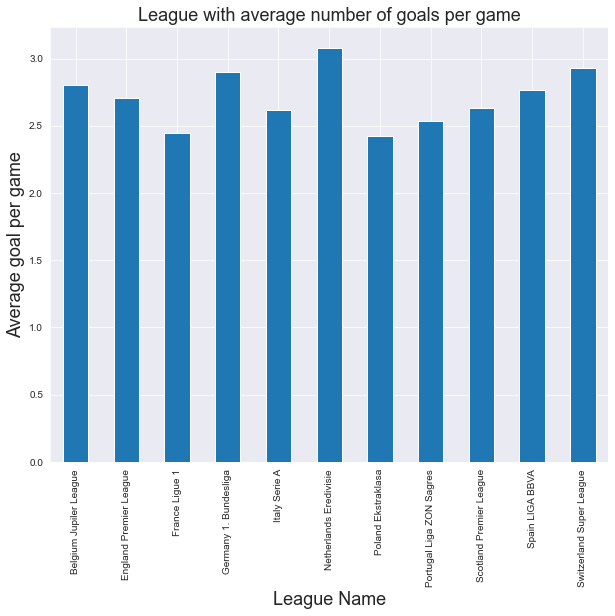

In [23]:
#Plotting a bar graph to show results

avg_goal_game.plot.bar(figsize = (10,8))
plt.ylabel('Average goal per game', fontsize = 18)
plt.xlabel('League Name', fontsize = 18)
plt.title('League with average number of goals per game', fontsize = 18)

## Research Question 2: Do home teams win more games than away teams 

To answer this research question, i will use the following dataframes:
><li>df_1


In [24]:
df_1.head()

,id,league_name,season,date,home_team_goal,away_team_goal,home_team,away_team,total_goals
0,1,Belgium Jupiler League,2008/2009,2008-08-17,1,1,KRC Genk,Beerschot AC,2
1,1,Belgium Jupiler League,2008/2009,2008-08-16,0,0,SV Zulte-Waregem,Sporting Lokeren,0
2,1,Belgium Jupiler League,2008/2009,2008-08-16,0,3,KSV Cercle Brugge,RSC Anderlecht,3
3,1,Belgium Jupiler League,2008/2009,2008-08-17,5,0,KAA Gent,RAEC Mons,5
4,1,Belgium Jupiler League,2008/2009,2008-08-16,1,3,FCV Dender EH,Standard de Liège,4


Defining a function and creating a column to show weather the game was won by the home team or the away team or if it was a draw
><li>W1 for home win 
><li>W2 for away win 
><li>D for draw

In [25]:
def wd (x,y):
    if x > y:
        return 'W1'
    elif x == y:
        return 'D'
    elif x < y :
        return 'W2'

df_1['outcome'] = list(map(wd,df_1['home_team_goal'],df_1['away_team_goal']))
df_1.head()

,id,league_name,season,date,home_team_goal,away_team_goal,home_team,away_team,total_goals,outcome
0,1,Belgium Jupiler League,2008/2009,2008-08-17,1,1,KRC Genk,Beerschot AC,2,D
1,1,Belgium Jupiler League,2008/2009,2008-08-16,0,0,SV Zulte-Waregem,Sporting Lokeren,0,D
2,1,Belgium Jupiler League,2008/2009,2008-08-16,0,3,KSV Cercle Brugge,RSC Anderlecht,3,W2
3,1,Belgium Jupiler League,2008/2009,2008-08-17,5,0,KAA Gent,RAEC Mons,5,W1
4,1,Belgium Jupiler League,2008/2009,2008-08-16,1,3,FCV Dender EH,Standard de Liège,4,W2


Grouping the data according to the output column to know the number of games drawn or won by either team

In [26]:
wins = df_1.groupby('outcome').count()['id']
wins

outcome
D      6596
W1    11917
W2     7466
Name: id, dtype: int64

Plotting the result in a bar chart 

Text(0.5, 1.0, 'Number of games by Outcome')

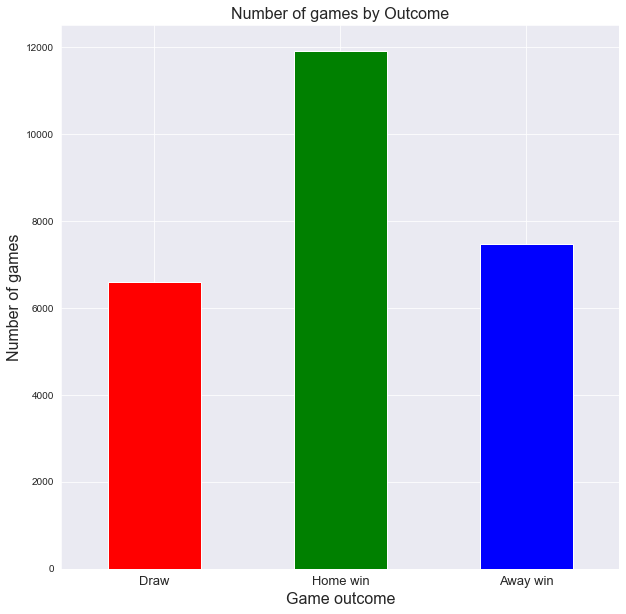

In [27]:
wins.plot.bar(figsize = (10,10),color = ['r','g','b'])
plt.xticks([0,1,2],labels=['Draw','Home win','Away win'],rotation = 0,fontsize = 13)
plt.xlabel('Game outcome',fontsize = 16)
plt.ylabel('Number of games',fontsize = 16)
plt.title('Number of games by Outcome',fontsize = 16)

## Research Question 3: The teams with the most wins in each Leagues in the 2014/2015 season

To answer this question i will use the following dataframes
><li>df_1

In [28]:
df_1.head()

,id,league_name,season,date,home_team_goal,away_team_goal,home_team,away_team,total_goals,outcome
0,1,Belgium Jupiler League,2008/2009,2008-08-17,1,1,KRC Genk,Beerschot AC,2,D
1,1,Belgium Jupiler League,2008/2009,2008-08-16,0,0,SV Zulte-Waregem,Sporting Lokeren,0,D
2,1,Belgium Jupiler League,2008/2009,2008-08-16,0,3,KSV Cercle Brugge,RSC Anderlecht,3,W2
3,1,Belgium Jupiler League,2008/2009,2008-08-17,5,0,KAA Gent,RAEC Mons,5,W1
4,1,Belgium Jupiler League,2008/2009,2008-08-16,1,3,FCV Dender EH,Standard de Liège,4,W2


In [29]:
df_1415 = df_1.copy()
df_1415.head()

,id,league_name,season,date,home_team_goal,away_team_goal,home_team,away_team,total_goals,outcome
0,1,Belgium Jupiler League,2008/2009,2008-08-17,1,1,KRC Genk,Beerschot AC,2,D
1,1,Belgium Jupiler League,2008/2009,2008-08-16,0,0,SV Zulte-Waregem,Sporting Lokeren,0,D
2,1,Belgium Jupiler League,2008/2009,2008-08-16,0,3,KSV Cercle Brugge,RSC Anderlecht,3,W2
3,1,Belgium Jupiler League,2008/2009,2008-08-17,5,0,KAA Gent,RAEC Mons,5,W1
4,1,Belgium Jupiler League,2008/2009,2008-08-16,1,3,FCV Dender EH,Standard de Liège,4,W2


In [30]:
#adding column for the name of the winning team 
def winteam (x,y,z):
    if z == 'D':
        return float('NaN')
    if z =='W1':
        return x
    if z == 'W2':
        return y
df_1415['winning_team'] = list(map(winteam,df_1415['home_team'],df_1415['away_team'],df_1415['outcome']))
df_1415.head()

,id,league_name,season,date,home_team_goal,away_team_goal,home_team,away_team,total_goals,outcome,winning_team
0,1,Belgium Jupiler League,2008/2009,2008-08-17,1,1,KRC Genk,Beerschot AC,2,D,NaN
1,1,Belgium Jupiler League,2008/2009,2008-08-16,0,0,SV Zulte-Waregem,Sporting Lokeren,0,D,NaN
2,1,Belgium Jupiler League,2008/2009,2008-08-16,0,3,KSV Cercle Brugge,RSC Anderlecht,3,W2,RSC Anderlecht
3,1,Belgium Jupiler League,2008/2009,2008-08-17,5,0,KAA Gent,RAEC Mons,5,W1,KAA Gent
4,1,Belgium Jupiler League,2008/2009,2008-08-16,1,3,FCV Dender EH,Standard de Liège,4,W2,Standard de Liège


In [31]:
# dropping null values 
df_1415.dropna(inplace=True)
df_1415.head()

,id,league_name,season,date,home_team_goal,away_team_goal,home_team,away_team,total_goals,outcome,winning_team
2,1,Belgium Jupiler League,2008/2009,2008-08-16,0,3,KSV Cercle Brugge,RSC Anderlecht,3,W2,RSC Anderlecht
3,1,Belgium Jupiler League,2008/2009,2008-08-17,5,0,KAA Gent,RAEC Mons,5,W1,KAA Gent
4,1,Belgium Jupiler League,2008/2009,2008-08-16,1,3,FCV Dender EH,Standard de Liège,4,W2,Standard de Liège
7,1,Belgium Jupiler League,2008/2009,2008-08-16,1,2,Tubize,Royal Excel Mouscron,3,W2,Royal Excel Mouscron
8,1,Belgium Jupiler League,2008/2009,2008-08-16,1,0,KVC Westerlo,Sporting Charleroi,1,W1,KVC Westerlo


Grouping by league name and winning team then counting the values 

In [32]:
#sorted the values to have the highest on top and converted the resulting series to a dataframe

wins_per_team = df_1415.groupby(['league_name','winning_team']).count()['id'].sort_values(ascending=False).to_frame().reset_index()

wins_per_team.head()

,league_name,winning_team,id
0,Spain LIGA BBVA,FC Barcelona,234
1,Spain LIGA BBVA,Real Madrid CF,228
2,Scotland Premier League,Celtic,218
3,Germany 1. Bundesliga,FC Bayern Munich,193
4,England Premier League,Manchester United,192


In order to get only the higest from each league the duplicated values from the league_name column are dropped keeping the first 

In [33]:
wins_per_team.drop_duplicates(subset=['league_name'],keep='first',inplace=True)
wins_per_team

,league_name,winning_team,id
0,Spain LIGA BBVA,FC Barcelona,234
2,Scotland Premier League,Celtic,218
3,Germany 1. Bundesliga,FC Bayern Munich,193
4,England Premier League,Manchester United,192
5,Italy Serie A,Juventus,189
6,Portugal Liga ZON Sagres,SL Benfica,185
8,Netherlands Eredivisie,Ajax,181
9,Switzerland Super League,FC Basel,180
12,France Ligue 1,Paris Saint-Germain,175
33,Poland Ekstraklasa,Legia Warszawa,137


Plotting the result in a bar chart

Text(0.5, 1.0, 'Highest winning team in each league for 2014/2015 season')

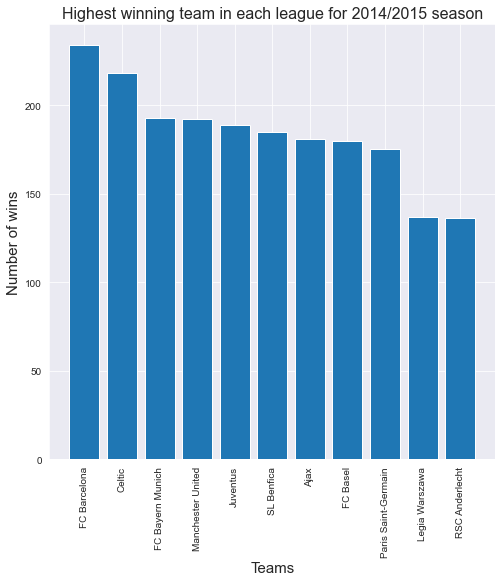

In [34]:
index = np.arange(0,len(wins_per_team))
plt.figure(figsize=(8,8))
plt.bar(index , wins_per_team['id'])
plt.xticks(index, wins_per_team['winning_team'],rotation = 90);
plt.xlabel('Teams', fontsize = 15)
plt.ylabel('Number of wins',fontsize = 15)
plt.title('Highest winning team in each league for 2014/2015 season', fontsize = 16)

## Research Question 4: Did players in 2016 meet the potential set for them in 2007

To answer this question i will use the following dataframes
><li>df_2

Splitting the dataframe into two to get the potential set in 2007 and the overall rating in 2016 

In [35]:
df_2007 = df_2[df_2['date'].dt.year == 2007]
df_2016 = df_2[df_2['date'].dt.year == 2016]

Checking for duplicates and dropping them, a name must appear only once in each dataframe

In [36]:
sum(df_2007.duplicated(subset = ['player_name']))

df_2007.drop_duplicates(subset =['player_name'], inplace=True)
df_2007.head()

<ipython-input-36-36d08a56ba84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2007.drop_duplicates(subset =['player_name'], inplace=True)


,player_name,birthday,player_api_id,date,overall_rating,potential
4,Aaron Appindangoye,1992-02-29,505942,2007-02-22,61.0,65.0
37,Aaron Cresswell,1989-12-15,155782,2007-02-22,53.0,60.0
63,Aaron Doran,1991-05-13,162549,2007-02-22,59.0,70.0
85,Aaron Galindo,1982-05-08,30572,2007-08-30,71.0,78.0
110,Aaron Hughes,1979-11-08,23780,2007-08-30,71.0,78.0


In [37]:
sum(df_2016.duplicated(subset = ['player_name']))

df_2016.drop_duplicates(subset =['player_name'], inplace=True)
df_2016.head()


<ipython-input-37-06d9a6fa98a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016.drop_duplicates(subset =['player_name'], inplace=True)


,player_name,birthday,player_api_id,date,overall_rating,potential
0,Aaron Appindangoye,1992-02-29,505942,2016-02-18,67.0,71.0
5,Aaron Cresswell,1989-12-15,155782,2016-04-21,74.0,76.0
38,Aaron Doran,1991-05-13,162549,2016-01-07,65.0,67.0
64,Aaron Galindo,1982-05-08,30572,2016-04-21,69.0,69.0
112,Aaron Hunt,1986-09-04,27316,2016-04-28,77.0,77.0


Merging the two dataframes on **player_name** and **birthday**

In [38]:
df_potential = df_2007.merge(df_2016, how= 'inner', on= ['player_name','birthday','player_api_id'])
df_potential.head()

,player_name,birthday,player_api_id,date_x,overall_rating_x,potential_x,date_y,overall_rating_y,potential_y
0,Aaron Appindangoye,1992-02-29,505942,2007-02-22,61.0,65.0,2016-02-18,67.0,71.0
1,Aaron Cresswell,1989-12-15,155782,2007-02-22,53.0,60.0,2016-04-21,74.0,76.0
2,Aaron Doran,1991-05-13,162549,2007-02-22,59.0,70.0,2016-01-07,65.0,67.0
3,Aaron Galindo,1982-05-08,30572,2007-08-30,71.0,78.0,2016-04-21,69.0,69.0
4,Aaron Hunt,1986-09-04,27316,2007-08-30,77.0,86.0,2016-04-28,77.0,77.0


Creating a **meet_potential** column to know if the players met their potential or not <br>
Creating a column to know how much the player has improved called **improvement**

In [39]:
df_potential = df_potential.assign(meet_potential = lambda x:x.overall_rating_y >= x.potential_x, improvement = lambda x:x.overall_rating_y - x.overall_rating_x )
df_potential.head()

,player_name,birthday,player_api_id,date_x,overall_rating_x,potential_x,date_y,overall_rating_y,potential_y,meet_potential,improvement
0,Aaron Appindangoye,1992-02-29,505942,2007-02-22,61.0,65.0,2016-02-18,67.0,71.0,True,6.0
1,Aaron Cresswell,1989-12-15,155782,2007-02-22,53.0,60.0,2016-04-21,74.0,76.0,True,21.0
2,Aaron Doran,1991-05-13,162549,2007-02-22,59.0,70.0,2016-01-07,65.0,67.0,False,6.0
3,Aaron Galindo,1982-05-08,30572,2007-08-30,71.0,78.0,2016-04-21,69.0,69.0,False,-2.0
4,Aaron Hunt,1986-09-04,27316,2007-08-30,77.0,86.0,2016-04-28,77.0,77.0,False,0.0


Grouping by **meet_potential** to know the amount of players that did 

In [40]:
df_potential.groupby('meet_potential').count()['birthday']

meet_potential
False    3278
True     2225
Name: birthday, dtype: int64

Get percentage of players that meet potential

In [41]:
df_potential.groupby('meet_potential').count()['birthday']/df_potential.count()['player_name'] * 100

meet_potential
False    59.567509
True     40.432491
Name: birthday, dtype: float64

Player that improved the most 

In [42]:
df_potential.sort_values('improvement', ascending = False).head()

,player_name,birthday,player_api_id,date_x,overall_rating_x,potential_x,date_y,overall_rating_y,potential_y,meet_potential,improvement
3313,Marco Reus,1989-05-31,129944,2007-02-22,44.0,62.0,2016-06-02,86.0,87.0,True,42.0
1397,Eden Hazard,1991-01-07,107417,2007-02-22,51.0,80.0,2016-01-28,88.0,90.0,True,37.0
566,Bakary Sako,1988-04-26,46417,2007-08-30,38.0,47.0,2016-03-24,75.0,75.0,True,37.0
4318,Radja Nainggolan,1988-05-04,41433,2007-08-30,46.0,61.0,2016-05-12,83.0,83.0,True,37.0
4442,Ricardo Rodriguez,1992-08-25,115591,2007-02-22,45.0,65.0,2016-02-25,82.0,86.0,True,37.0


To know if players age in 2007 influened the players improvement, another column called **age** will be added 

In [43]:
df_potential = df_potential.assign(age = lambda x: 2007 - x.birthday.dt.year)

In [44]:
df_potential.describe()

,player_api_id,overall_rating_x,potential_x,overall_rating_y,potential_y,improvement,age
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000
mean,197717.099400,62.204434,71.922951,70.000182,73.028893,7.795748,18.151009
std,176578.333293,8.079587,7.602413,6.088273,5.980831,8.035888,4.390961
min,2768.000000,35.000000,39.000000,47.000000,54.000000,-20.000000,8.000000
25%,41117.500000,57.000000,67.000000,66.000000,69.000000,2.000000,15.000000
50%,158278.000000,62.000000,72.000000,70.000000,73.000000,7.000000,18.000000
75%,281845.500000,67.000000,77.000000,74.000000,77.000000,13.000000,21.000000
max,750584.000000,91.000000,93.000000,90.000000,94.000000,42.000000,35.000000


Making a scatterplot to show the findings 

Text(0, 0.5, 'Improvement')

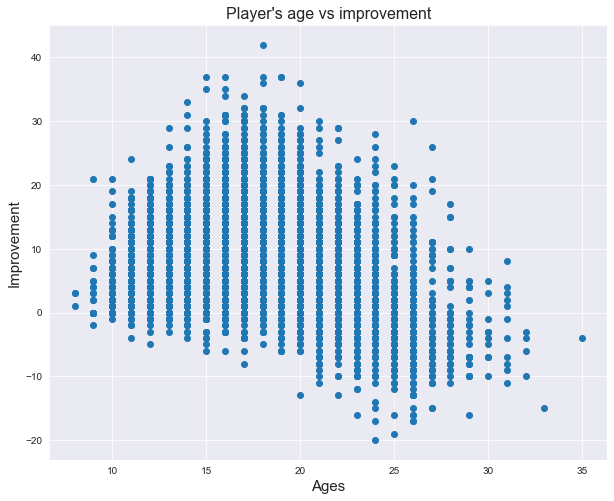

In [45]:
plt.figure(figsize =(10,8))
plt.scatter(df_potential['age'],df_potential['improvement'])
plt.title("Player's age vs improvement", fontsize = 16 )
plt.xlabel('Ages',fontsize = 15)
plt.ylabel('Improvement',fontsize = 15)

## Research Question 5: Team attribute leading to victory

To answer this question i will use the following dataframes
><li>df_1
 <li>df_3

In [46]:
df_1.head()

,id,league_name,season,date,home_team_goal,away_team_goal,home_team,away_team,total_goals,outcome
0,1,Belgium Jupiler League,2008/2009,2008-08-17,1,1,KRC Genk,Beerschot AC,2,D
1,1,Belgium Jupiler League,2008/2009,2008-08-16,0,0,SV Zulte-Waregem,Sporting Lokeren,0,D
2,1,Belgium Jupiler League,2008/2009,2008-08-16,0,3,KSV Cercle Brugge,RSC Anderlecht,3,W2
3,1,Belgium Jupiler League,2008/2009,2008-08-17,5,0,KAA Gent,RAEC Mons,5,W1
4,1,Belgium Jupiler League,2008/2009,2008-08-16,1,3,FCV Dender EH,Standard de Liège,4,W2


In [47]:
df_3.head()

,team_long_name,team_api_id,date,buildupplayspeed,chancecreationshootingclass,defencepressure
0,FC Aarau,9930,2016-02-18,60,Normal,50
1,FC Aarau,9930,2015-11-19,52,Normal,47
2,FC Aarau,9930,2015-09-21,47,Normal,47
3,Aberdeen,8485,2015-03-20,70,Lots,60
4,Aberdeen,8485,2007-02-22,47,Normal,47


To make use of this data i have to make some modiffications which includes:
<br><li>Adding a **year** column to both dataframes
    <li>Make sure a team has only 1 row per year in **df_3**
    <li>Changing the **outcome** column in **df_1** to show W/D/L

In [48]:
df_ta1 = df_1.assign(year = lambda x: x.date.dt.year) 
df_ta1.head()

,id,league_name,season,date,home_team_goal,away_team_goal,home_team,away_team,total_goals,outcome,year
0,1,Belgium Jupiler League,2008/2009,2008-08-17,1,1,KRC Genk,Beerschot AC,2,D,2008
1,1,Belgium Jupiler League,2008/2009,2008-08-16,0,0,SV Zulte-Waregem,Sporting Lokeren,0,D,2008
2,1,Belgium Jupiler League,2008/2009,2008-08-16,0,3,KSV Cercle Brugge,RSC Anderlecht,3,W2,2008
3,1,Belgium Jupiler League,2008/2009,2008-08-17,5,0,KAA Gent,RAEC Mons,5,W1,2008
4,1,Belgium Jupiler League,2008/2009,2008-08-16,1,3,FCV Dender EH,Standard de Liège,4,W2,2008


In [49]:
df_ta3 = df_3.assign(year = lambda x: x.date.dt.year)
df_ta3.head()

,team_long_name,team_api_id,date,buildupplayspeed,chancecreationshootingclass,defencepressure,year
0,FC Aarau,9930,2016-02-18,60,Normal,50,2016
1,FC Aarau,9930,2015-11-19,52,Normal,47,2015
2,FC Aarau,9930,2015-09-21,47,Normal,47,2015
3,Aberdeen,8485,2015-03-20,70,Lots,60,2015
4,Aberdeen,8485,2007-02-22,47,Normal,47,2007


Clearing duplicate years in **df_ta3**

In [50]:
df_ta3.drop_duplicates(subset=['team_long_name','year'],inplace=True)
df_ta3.head()

,team_long_name,team_api_id,date,buildupplayspeed,chancecreationshootingclass,defencepressure,year
0,FC Aarau,9930,2016-02-18,60,Normal,50,2016
1,FC Aarau,9930,2015-11-19,52,Normal,47,2015
3,Aberdeen,8485,2015-03-20,70,Lots,60,2015
4,Aberdeen,8485,2007-02-22,47,Normal,47,2007
5,Aberdeen,8485,2016-04-21,58,Normal,40,2016


Changing the outcome of **df_ta1**

In [51]:
def wld (x,y):
    if x > y:
        return 'W'
    elif x == y:
        return 'D'
    elif x < y :
        return 'L'

df_ta1['outcome'] = list(map(wld,df_1['home_team_goal'],df_1['away_team_goal']))
df_ta1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              25979 non-null  int64         
 1   league_name     25979 non-null  object        
 2   season          25979 non-null  object        
 3   date            25979 non-null  datetime64[ns]
 4   home_team_goal  25979 non-null  int64         
 5   away_team_goal  25979 non-null  int64         
 6   home_team       25979 non-null  object        
 7   away_team       25979 non-null  object        
 8   total_goals     25979 non-null  int64         
 9   outcome         25979 non-null  object        
 10  year            25979 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 2.2+ MB


Merge the two dataframes **df_ta1** and **df_ta3** on **year**, __home_team__ and **team_long_name**

In [59]:
df_ta = df_ta1.merge(df_ta3, how = 'inner', left_on=['home_team','year'], right_on=['team_long_name','year'])
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7327 entries, 0 to 7326
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           7327 non-null   int64         
 1   league_name                  7327 non-null   object        
 2   season                       7327 non-null   object        
 3   date_x                       7327 non-null   datetime64[ns]
 4   home_team_goal               7327 non-null   int64         
 5   away_team_goal               7327 non-null   int64         
 6   home_team                    7327 non-null   object        
 7   away_team                    7327 non-null   object        
 8   total_goals                  7327 non-null   int64         
 9   outcome                      7327 non-null   object        
 10  year                         7327 non-null   int64         
 11  team_long_name               7327 non-null 

In [60]:
df_ta.head()

,id,league_name,season,date_x,home_team_goal,away_team_goal,home_team,away_team,total_goals,outcome,year,team_long_name,team_api_id,date_y,buildupplayspeed,chancecreationshootingclass,defencepressure
0,1,Belgium Jupiler League,2008/2009,2008-08-17,1,1,KRC Genk,Beerschot AC,2,D,2008,KRC Genk,9987,2008-08-30,58,Normal,47
1,1,Belgium Jupiler League,2008/2009,2008-11-15,1,1,KRC Genk,KSV Roeselare,2,D,2008,KRC Genk,9987,2008-08-30,58,Normal,47
2,1,Belgium Jupiler League,2008/2009,2008-11-29,3,2,KRC Genk,KSV Cercle Brugge,5,W,2008,KRC Genk,9987,2008-08-30,58,Normal,47
3,1,Belgium Jupiler League,2008/2009,2008-12-13,1,0,KRC Genk,Sporting Charleroi,1,W,2008,KRC Genk,9987,2008-08-30,58,Normal,47
4,1,Belgium Jupiler League,2008/2009,2008-08-30,1,0,KRC Genk,Sporting Lokeren,1,W,2008,KRC Genk,9987,2008-08-30,58,Normal,47


Grouping by **chancecreationshootingclass** then **outcome**

In [54]:
ccsc = df_ta.groupby(['chancecreationshootingclass', 'outcome']).count()['year']

In [55]:
# proportions 
ccsc = ccsc/df_ta.groupby(['chancecreationshootingclass']).count()['year']

In [56]:
ccsc

chancecreationshootingclass  outcome
Little                       D          0.242991
                             L          0.224299
                             W          0.532710
Lots                         D          0.224595
                             L          0.229773
                             W          0.545631
Normal                       D          0.260264
                             L          0.294449
                             W          0.445286
Name: year, dtype: float64

Ploting on a bar chart 

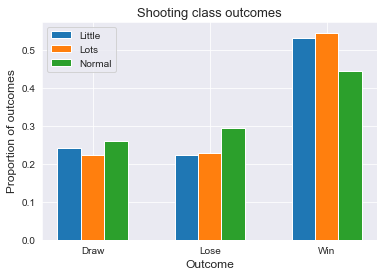

In [73]:
ind = np.arange(0,3,1)
width = 0.2
plt.bar(ind-0.2,ccsc[0:3],width)
plt.bar(ind,ccsc[3:6],width)
plt.bar(ind+0.2,ccsc[6:9],width)
plt.xticks(ind,('Draw','Lose','Win'));
plt.xlabel('Outcome', fontsize = 12)
plt.ylabel('Proportion of outcomes', fontsize = 12)
plt.title('Shooting class outcomes', fontsize = 13)
plt.legend(['Little','Lots','Normal'],fontsize = 10);

Creating a scatter plot diagram to know if **buildupplayspeed** has any influence on **home_team_goal**

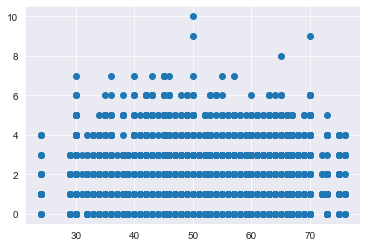

In [76]:
plt.scatter(df_ta['buildupplayspeed'],df_ta['home_team_goal'])

Creating a scatter plot diagram to know if **defencepressure** has any influence on **away_team_goal**

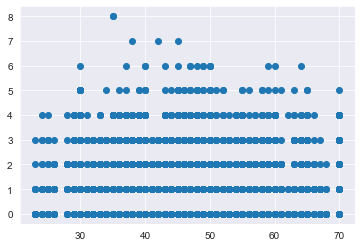

In [77]:
plt.scatter(df_ta['defencepressure'],df_ta['away_team_goal'])

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!